### This notebook calculates the average winning scores of tournaments.

File <b>'test_d3-r55_20.txt'</b> recorded results of 20 tournaments 

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
frst_token = 'Random'
win_ratio = 'WinRate'
def add_num_wins(line, fd, match_wins):
    '''parsing results and load the extracted data to a dictionary with keys of opponent names'''
    for i in range(7): 
        ts = line.split()
        if len(ts) == 14:
            opp = ts[1].strip()
            if opp not in match_wins:
                match_wins[opp] = [[ int(ts[2]), int(ts[5]), int(ts[8]), int(ts[11]) ]]
            else:
                match_wins[opp].append( [int(ts[2]), int(ts[5]), int(ts[8]), int(ts[11])] )
            line = fd.readline()
    line = fd.readline()
    ts = line.split()
    if len(ts) == 6:
        if win_ratio in match_wins:
            match_wins[win_ratio].append( [float(ts[2][:-2]), float(ts[3][:-2]), float(ts[4][:-2]), float(ts[5][:-2])] )
        else:
            match_wins[win_ratio] = [[float(ts[2][:-2]), float(ts[3][:-2]), float(ts[4][:-2]), float(ts[5][:-2])]]


In [3]:
fname="test_d3-r55_20.txt"
match_wins2 = {}
with open(fname, 'r') as fd:
    for line in fd:
        if frst_token in line:
            add_num_wins(line, fd, match_wins2) 
# load result dict to pandas DataFrame. idx are colume names, using the player names  
idx = ['AB_Improved', 'AB_Custom', 'AB_Custom_2', 'AB_Custom_3']
pd_match = {k : pd.DataFrame(v, columns=idx) for k,v in match_wins2.items()}
# calculate means for each col
for k, df in pd_match.items():
    df.loc['mean'] = df.mean()
pd_match[win_ratio]            

,AB_Improved,AB_Custom,AB_Custom_2,AB_Custom_3
0,52.00,48.00,55.00,60.00
1,55.00,51.00,58.00,60.00
2,57.00,58.00,58.00,61.00
3,47.00,48.00,51.00,60.00
4,61.00,60.00,52.00,55.00
5,58.00,62.00,54.00,51.00
6,58.00,52.00,60.00,55.00
7,51.00,61.00,51.00,52.00
8,55.00,52.00,67.00,44.00
9,65.00,60.00,55.00,55.00


Calculate the avarage winning ration for each opponent.

In [17]:
df_means = pd.DataFrame()
row_name =[]
for k, df in pd_match.items():
    mean_series = df.mean()
    df_means = df_means.append(mean_series, ignore_index=True)
    row_name.append(k)
df_means.index = row_name
df_means

,AB_Custom,AB_Custom_2,AB_Custom_3,AB_Improved
Random,8.70,8.55,8.80,8.55
MM_Open,4.75,3.95,4.15,3.75
MM_Center,7.15,6.95,6.85,6.70
MM_Improved,3.80,3.85,3.65,3.70
AB_Open,5.60,5.35,5.45,5.20
AB_Center,5.55,5.45,5.75,5.35
AB_Improved,4.70,5.00,5.15,4.95
WinRate,56.95,55.35,56.45,54.05


fig= Figure(1440x1008)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


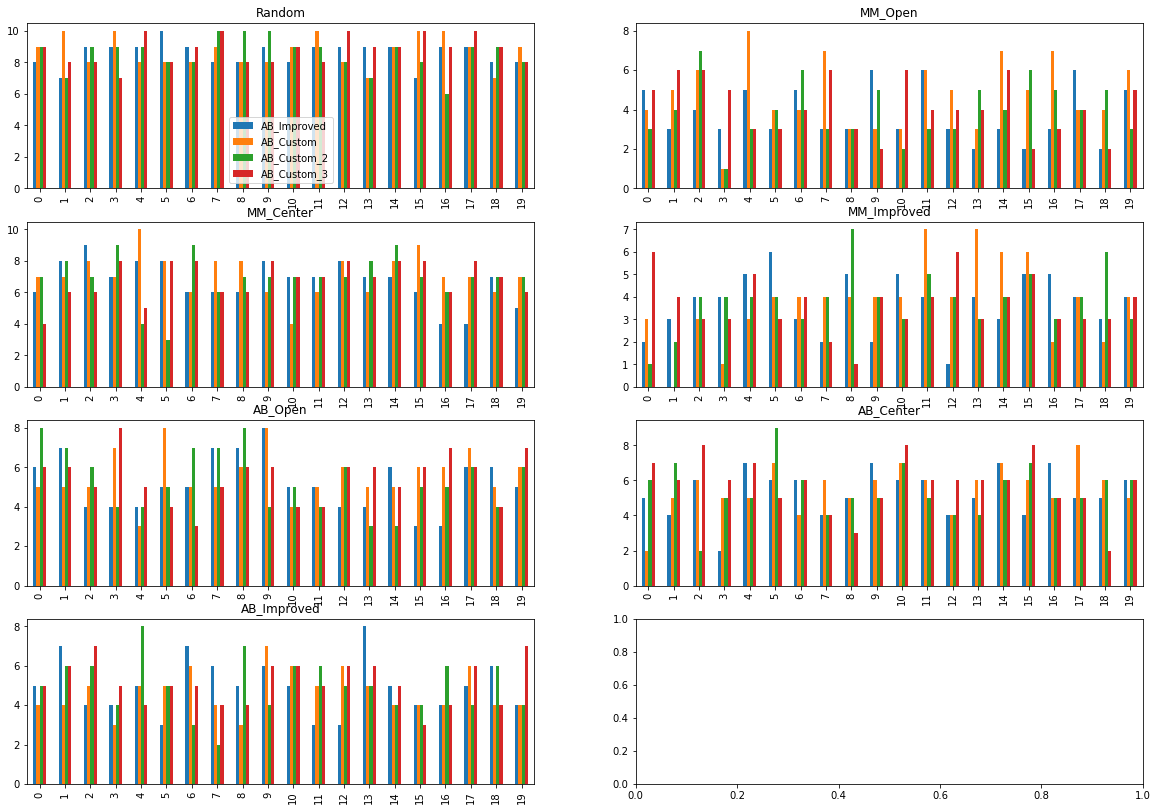

In [18]:
plt.close('all')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 14))
print('fig=', fig)
for i, (k, df) in enumerate(pd_match.items()):
    if k != 'WinRate':
        df[:-1].plot(kind='bar', legend=(i==0), ax=axes[i / 2, i % 2], title=k)


In [31]:
fname="test_d3-r55_20.5.txt"
match_wins2 = {}
with open(fname, 'r') as fd:
    for line in fd:
        if frst_token in line:
            add_num_wins(line, fd, match_wins2) 
# load result dict to pandas DataFrame. idx are colume names, using the player names  
idx = ['AB_Improved', 'AB_Custom', 'AB_Custom_2', 'AB_Custom_3']
pd_match = {k : pd.DataFrame(v, columns=idx) for k,v in match_wins2.items()}
# calculate means for each col
for k, df in pd_match.items():
    df.loc['mean'] = df.mean()
pd_match[win_ratio]            

,AB_Improved,AB_Custom,AB_Custom_2,AB_Custom_3
0,61.00,65.0,62.0,50.0
1,58.00,55.0,70.0,55.0
2,50.00,47.0,47.0,61.0
3,50.00,58.0,54.0,58.0
4,64.00,52.0,48.0,55.0
5,54.00,54.0,61.0,51.0
6,61.00,47.0,52.0,58.0
7,55.00,51.0,55.0,54.0
8,62.00,51.0,57.0,51.0
9,52.00,52.0,52.0,51.0
